In [1]:
import os
import sys
cwd = os.getcwd()
ooipy_dir = os.path.dirname(os.path.dirname(cwd)) + '/ooipy'
sys.path.append(ooipy_dir)
from ooipy.hydrophone import Noise_Interferometry
from matplotlib import pyplot as plt
import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import pickle
import scipy
from gwpy.timeseries import TimeSeries
import seaborn as sns
import gwpy
import progressbar

cwd = os.getcwd()
code_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(code_dir)

from Noise_Interferometry.Modules import analysis
from Noise_Interferometry.Modules import snr_tools

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
filename = 'SNRs.pkl'
with open(filename, 'rb') as f:
    SNRs = pickle.load(f)

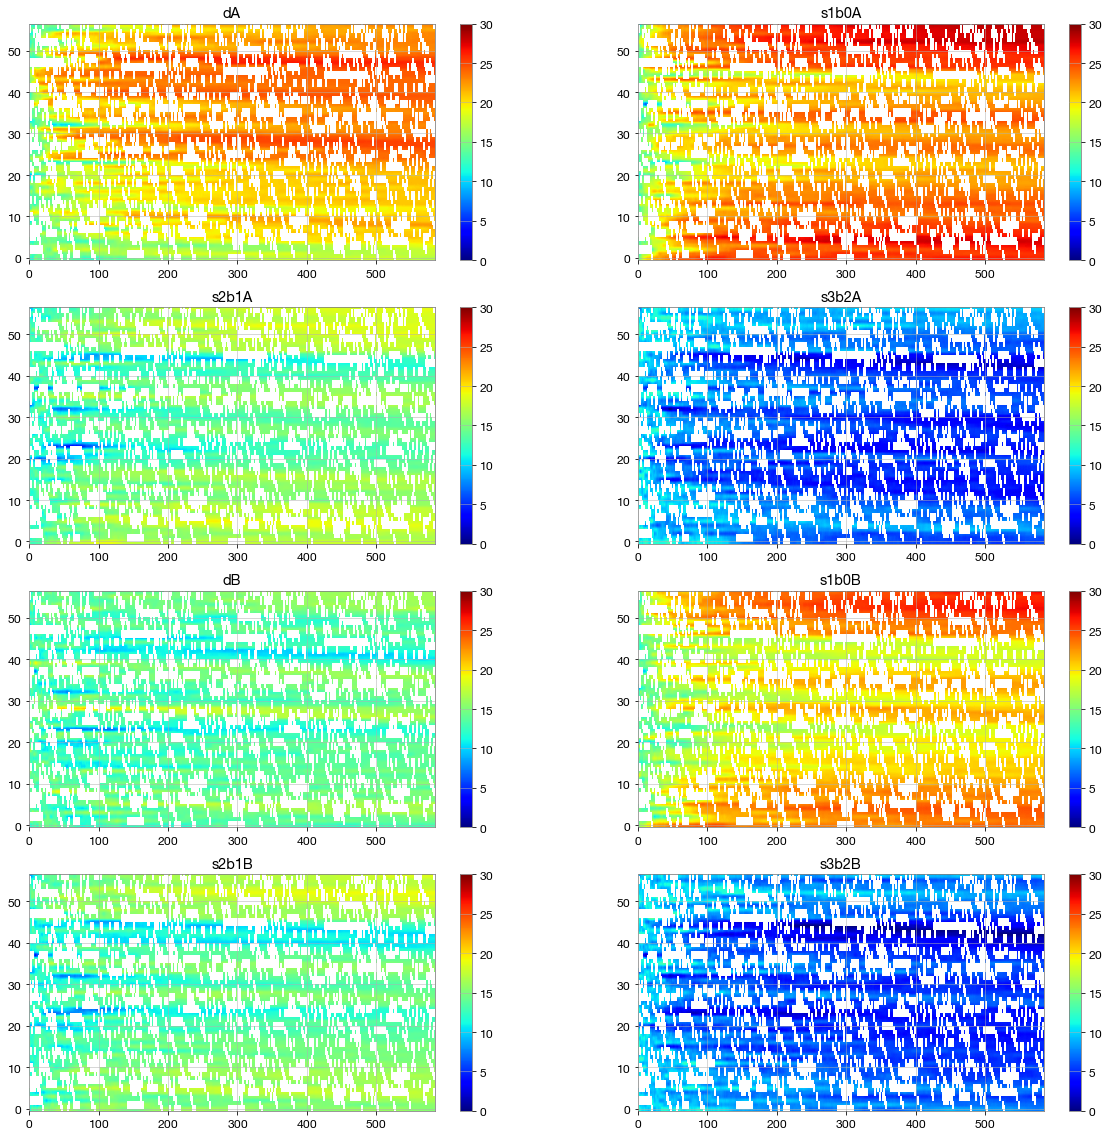

In [4]:
# Create Subplots with missing data
fig1 = plt.figure(figsize=(20,20))

peak_names = ['dA', 's1b0A', 's2b1A', 's3b2A', 'dB', 's1b0B', 's2b1B', 's3b2B']

for k in range(8):
    plt.subplot(4,2,k+1)
    plt.imshow(np.squeeze(SNRs[k,:,:]),aspect='auto', origin='lower', vmin=0, vmax=30, cmap='jet')
    plt.title(peak_names[k])
    plt.colorbar()
    
    
fig1.savefig('SNR_plots_gap.png',dpi=300)


## Make Gapless Plots

In [5]:
SNRs_no_gap = np.zeros(SNRs.shape)

for k in range(8):
    for n in range(57):
        no_gap = SNRs[k,n,~SNRs.mask[k,n,:]]
        SNRs_no_gap[k,n,:no_gap.shape[0]] = no_gap

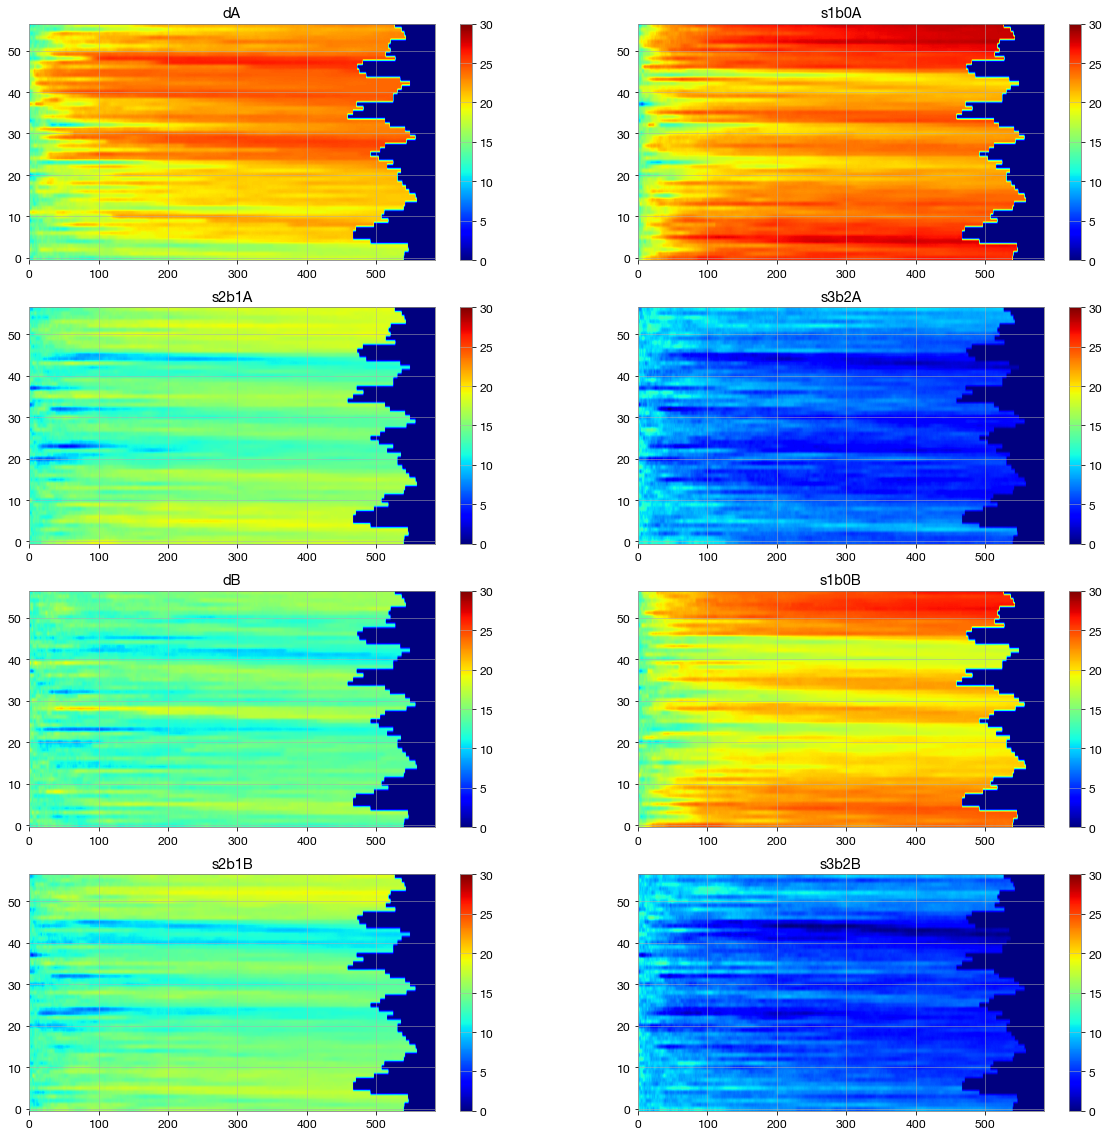

In [6]:
# Create Subplots with missing data
fig2 = plt.figure(figsize=(20,20))

peak_names = ['dA', 's1b0A', 's2b1A', 's3b2A', 'dB', 's1b0B', 's2b1B', 's3b2B']
for k in range(8):
    plt.subplot(4,2,k+1)
    plt.imshow(np.squeeze(SNRs_no_gap[k,:,:]),aspect='auto', origin='lower', vmin=0, vmax=30, cmap='jet')
    plt.title(peak_names[k])
    plt.colorbar()
    
fig2.savefig('SNR_plots_no_gap.png',dpi=300)

## Threshold Plots

(0.0, 100.0)

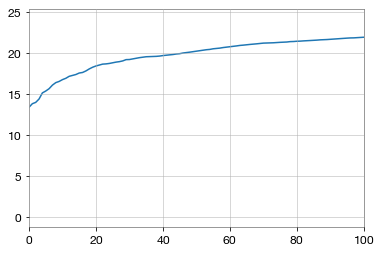

In [18]:
plt.plot(np.mean(np.squeeze(SNRs_no_gap[1,:,:]),axis=0))
plt.xlim([0,100])

In [19]:
np.mean(np.squeeze(SNRs_no_gap[1,:,:]),axis=0)[0]

13.364950129680228